# Medical Examiner Case Archives

Cook County (Chicago) medical examiner records, taken from [here](https://datacatalog.cookcountyil.gov/Public-Safety/Medical-Examiner-Case-Archive/cjeq-bs86) after discovery via [Data is Plural](https://tinyletter.com/data-is-plural).

## Do your importing/setup

In [1]:
import pandas as pd
import numpy as np

/Users/sheridanwall/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the data, check its row count and column types

In [2]:
df = pd.read_csv("case-archive-encoded.csv", na_values=['Data missing'])

In [3]:
df.head()
df.shape

(22634, 20)

In [4]:
df.columns

Index(['Case Number', 'Date of Incident', 'Date of Death', 'Age', 'Gender',
       'Race', 'Latino', 'Manner of Death', 'Primary Cause',
       'Primary Cause Line B', 'Primary Cause Line C', 'Secondary Cause',
       'Gun Related', 'Opioid Related', 'Incident Address', 'Incident City',
       'longitude', 'latitude', 'OBJECTID', 'location'],
      dtype='object')

## Cleaning up your data

First you'll want to convert the `Race` and `Gender` columns from codes into actual text to make analysis easier.

### Gender codes

* `-1` - `Data missing`
* `0` - `Female`
* `1` - `Male`
* `2` - `Unknown`

### Race codes

* `-1` - `Data missing`
* `0` - `American Indian`
* `1` - `Asian`
* `2` - `Black`
* `3` - `Other`
* `4` - `Unknown`
* `5` - `White`

In [5]:
df.dtypes
df.head()

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
0,ME2017-04255,09/10/2017 08:28:00 PM,09/10/2017 08:51:00 PM,51.0,1,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20468,NaN
1,ME2018-02149,05/05/2018 06:30:00 AM,05/05/2018 06:41:00 AM,65.0,1,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110 W. 21ST PL #1,CHICAGO,-87.678845,41.853279,77827,"(41.8532787, -87.6788449)"
2,ME2018-02154,04/26/2018 08:29:00 AM,05/05/2018 04:45:00 AM,95.0,1,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20704 S Woodlawn Ct,FRANKFORT,NaN,NaN,77839,NaN
3,ME2018-02156,05/05/2018 12:00:00 PM,05/05/2018 12:25:00 PM,64.0,0,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4008 W. BERTEAU AVENUE, APT #1",CHICAGO,-87.728177,41.957468,77823,"(41.9574677, -87.7281769)"
4,ME2018-02158,05/05/2018 09:30:00 AM,05/05/2018 09:50:00 AM,61.0,1,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3947 W. LEXINGTON STREET,CHICAGO,-87.724739,41.871451,77822,"(41.8714515, -87.7247386)"


In [6]:
df.Gender = df.Gender.replace({
    -1: np.nan,
    0: 'Female',
    1: 'Male',
    2: 'Unknown'
  
})
df.head()

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
0,ME2017-04255,09/10/2017 08:28:00 PM,09/10/2017 08:51:00 PM,51.0,Male,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20468,NaN
1,ME2018-02149,05/05/2018 06:30:00 AM,05/05/2018 06:41:00 AM,65.0,Male,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110 W. 21ST PL #1,CHICAGO,-87.678845,41.853279,77827,"(41.8532787, -87.6788449)"
2,ME2018-02154,04/26/2018 08:29:00 AM,05/05/2018 04:45:00 AM,95.0,Male,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20704 S Woodlawn Ct,FRANKFORT,NaN,NaN,77839,NaN
3,ME2018-02156,05/05/2018 12:00:00 PM,05/05/2018 12:25:00 PM,64.0,Female,5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4008 W. BERTEAU AVENUE, APT #1",CHICAGO,-87.728177,41.957468,77823,"(41.9574677, -87.7281769)"
4,ME2018-02158,05/05/2018 09:30:00 AM,05/05/2018 09:50:00 AM,61.0,Male,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3947 W. LEXINGTON STREET,CHICAGO,-87.724739,41.871451,77822,"(41.8714515, -87.7247386)"


In [7]:
df.Race = df.Race.replace({
    -1: np.nan,
    0: 'American Indian',
    1: 'Asian',
    2: 'Black',
    3: 'Other',
    4: 'Unknown',
    5: 'White'
})
df.head()

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
0,ME2017-04255,09/10/2017 08:28:00 PM,09/10/2017 08:51:00 PM,51.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20468,NaN
1,ME2018-02149,05/05/2018 06:30:00 AM,05/05/2018 06:41:00 AM,65.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110 W. 21ST PL #1,CHICAGO,-87.678845,41.853279,77827,"(41.8532787, -87.6788449)"
2,ME2018-02154,04/26/2018 08:29:00 AM,05/05/2018 04:45:00 AM,95.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20704 S Woodlawn Ct,FRANKFORT,NaN,NaN,77839,NaN
3,ME2018-02156,05/05/2018 12:00:00 PM,05/05/2018 12:25:00 PM,64.0,Female,White,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4008 W. BERTEAU AVENUE, APT #1",CHICAGO,-87.728177,41.957468,77823,"(41.9574677, -87.7281769)"
4,ME2018-02158,05/05/2018 09:30:00 AM,05/05/2018 09:50:00 AM,61.0,Male,Black,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3947 W. LEXINGTON STREET,CHICAGO,-87.724739,41.871451,77822,"(41.8714515, -87.7247386)"


## What percent of the dataset is men, and what percent is women?

It should display as **Male** and **Female**, not as numbers.

In [8]:
df.Gender.value_counts(normalize=True)*100

Male       71.708161
Female     28.238583
Unknown     0.053255
Name: Gender, dtype: float64

## Getting rid of "Data missing"

`Unknown` means that officially the gender or race is unknown, while `Data missing` means the record is incomplete. That means "Data missing" should have been `NaN`!

Go back to your `read_csv` many cells before and make it so that "Data missing" is automatically set as `NaN`.

- *Tip: Do not use `.replace` for this one!*
- *Tip: Look at the options for `read_csv`, there's something that lets you specify missing values*
- *Tip: It isn't `"Data missing"` - think about how you already replaced*
- *Tip: Be sure you're using an array when you tell it what the 'missing' options are*

### After you've done this, re-run all of the the previous cells and confirm that `"Data missing"` does not exist any more

## What is the most common race in the dataset? We want percentages.

We'll come back to this later, I'm just having you check the column for now.

In [9]:
df.Race.value_counts(normalize=True)*100

White              55.486450
Black              41.608174
Asian               1.519325
Other               1.195024
Unknown             0.124389
American Indian     0.066637
Name: Race, dtype: float64

## Do a `.value_counts()` on the `Opioid Related` column

In [10]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.Opioid_Related.value_counts()

True    3378
Name: Opioid_Related, dtype: int64

## That's weird. Did everyone die from opioids? Try again, but including missing data.

In [11]:
df.Opioid_Related.isna().value_counts()

True     19256
False     3378
Name: Opioid_Related, dtype: int64

## Cleaning up True/False columns

For some reason in this dataset, the True/False columns are either `True` or `NaN`. `NaN` causes a lot of problems, I'd rather have it be false.

You can use [`fillna`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html) to fill in empty data - it's like `.replace` but for `NaN`.

### Replace all `NaN` values with `False` for the "Gun Related" and "Opioid Related" columns.

In [12]:
df.Gun_Related.fillna(value=False, inplace=True)
df.Opioid_Related.fillna(value=False, inplace=True)

### Do another value counts on Opioid Related to make sure it has both True and False values

In [13]:
df.Opioid_Related.value_counts()

False    19256
True      3378
Name: Opioid_Related, dtype: int64

# Back to analysis!

## What's the average age people were when they died?

In [14]:
df.Age.mean()

51.279928793947484

## Let's look at how the oldest people died

We're just going to browse. Read through how the **oldest 30 people died.**

In [15]:
df.sort_values(by='Age', ascending=False).head(30)

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
21142,ME2018-00494,01/11/2018 12:00:00 PM,01/24/2018 03:48:00 PM,106.0,Female,White,False,ACCIDENT,COMPLICATIONS OF A FALL,NaN,NaN,NaN,False,False,627 ORIOLE DR SYMPHONY NURSING HOME,STREAMWOOD,-88.166639,42.014994,61564,"(42.0149937, -88.1666392)"
17602,ME2017-02853,06/19/2017 08:15:00 PM,06/20/2017 10:08:00 PM,106.0,Female,White,False,NaN,ACUTE MYOCARDIAL INFARCTION,NaN,NaN,"FRACTURE OF FEMUR DUE TO FALL, HYPERTENSIVE AN...",False,False,8021 W 151st St,ORLAND PARK,-87.815531,41.615936,59223,"(41.6159359, -87.8155315)"
12106,ME2016-03535,07/20/2016 06:30:00 PM,07/20/2016 06:58:00 PM,105.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,126 DIVERSEY,NORTHLAKE,-87.908596,41.929038,57807,"(41.9290381, -87.9085962)"
4942,ME2015-01809,04/26/2015 03:30:00 PM,05/03/2015 03:06:00 PM,103.0,Female,White,False,ACCIDENT,COMPLICATIONS OF FALL,NaN,NaN,NaN,False,False,7 WILLOW COURT,COUNTRYSIDE,-87.860635,41.783044,56056,"(41.7830443, -87.8606347)"
9376,ME2016-00729,02/10/2016 11:53:00 PM,02/11/2016 12:25:00 AM,103.0,Female,White,False,NATURAL,ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,1933 Arklow Street,SCHAUMBURG,-88.127944,42.025985,61674,"(42.0259851, -88.1279436)"
8653,ME2015-05648,12/28/2015 09:30:00 PM,12/28/2015 09:59:00 PM,103.0,Female,Black,False,NATURAL,HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...,NaN,NaN,NaN,False,False,"4206 W. POTOMAC, 1ST FLOOR",CHICAGO,-87.731690,41.904602,68911,"(41.904602, -87.7316903)"
14697,ME2016-06170,12/23/2016 10:30:00 PM,12/24/2016 02:00:00 AM,101.0,Female,Black,False,ACCIDENT,INHALATION OF PRODUCTS OF COMBUSTION,NaN,NaN,NaN,False,False,2000 S. 9TH,MAYWOOD,-87.843632,41.867806,62018,"(41.8678057, -87.8436321)"
11558,ME2016-02979,06/12/2016 08:30:00 AM,06/17/2016 07:50:00 AM,101.0,Female,White,False,ACCIDENT,COMPLICATIONS OF LEFT FEMORAL NECK FRACTURE,NaN,NaN,"DEMENTIA, HYPERTENSION, ANEMIA",False,False,1270 FRANCISCAN DRIVE - MOTHER TERESA NH,LEMONT,-87.972860,41.679977,63499,"(41.6799768, -87.9728597)"
9904,ME2016-01281,03/13/2016 04:30:00 PM,03/13/2016 04:57:00 PM,101.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"3409 SOUTH ASHLAND, 1ST FLOOR REAR APT.",CHICAGO,-87.665314,41.831971,65188,"(41.831971, -87.6653139)"
13498,ME2016-04942,10/14/2016 04:00:00 PM,10/14/2016 04:21:00 PM,101.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"2626 NORTH LAKEVIEW, UNIT 3008",CHICAGO,-87.639827,41.930351,67009,"(41.9303508, -87.6398266)"


## Seems like a lot of problems with fractures

### What's the median age of someone dying from a cause that involves a fracture?

Are fractures especially dangerous for the elderly?

- *Tip: Filter for a cause that involves a fracture, then take the median age*
- *Tip: If you get a "cannot index NA values" error, the problem is it's trying to search `NaN` values and doesn't know what to do with them. You need to tell pandas to count `NaN` as false by setting another option - it isn't `NaN=False`, but it's close!*

In [16]:
# df.fillna(value=False)
# df.head(30)

In [17]:
df[df['Primary_Cause'].str.contains("FRACTURE", na=False)].Age.median()

86.0

### To get a "compared to what?", what's the median age of _anyone_ dying an accidental death?

In [18]:
df[df.Manner_of_Death == "ACCIDENT"].Age.median()

51.0

### What's the median age of each manner of death?

It looks like different kinds of death might happen to different ages of people. Let's investigate that further.

In [19]:
df.groupby('Manner_of_Death').Age.median()

Manner_of_Death
ACCIDENT        51.0
HOMICIDE        26.0
NATURAL         61.0
PENDING         47.0
SUICIDE         45.0
UNDETERMINED    21.0
Name: Age, dtype: float64

### Who is the oldest homicide victim?

It looks like homicide is for young people, so maybe we'll find an interesting outlier?

In [20]:
df[df.Manner_of_Death == 'HOMICIDE'].sort_values(by='Age', ascending=False).head(1)

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"


## Investigating toxicity-related homicides

She was old, and was purposefully overdosed on morphine and hydrocodone. Might have been euthenasia? Let's find similar cases.

### Find every homicide where the primary cause of death is some sort of toxicity

Toxicity can just overdose. You should have **ten rows**.

- *Tip: If you're doing this as one statement, make sure you use your parentheses correctly. If you leave them out, you'll have zero rows*
- *Tip: You could make a homicides-only dataframe if you wanted to*

In [21]:
homicides = df[(df.Manner_of_Death == 'HOMICIDE')].reset_index()
homicides[homicides.Primary_Cause.str.contains('TOXICITY', na=False)]

,index,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,...,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
416,3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,...,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"
576,5395,ME2015-02286,05/27/2015 03:15:00 PM,06/03/2015 07:25:00 PM,28.0,Female,White,False,HOMICIDE,"COMPLICATIONS OF AMITRIPTYLINE AND METABOLITE,...",...,NaN,NaN,False,False,1102 S. Springinsguth Rd. #1D,SCHAUMBURG,-88.119741,42.005376,60663,"(42.005376, -88.1197414)"
679,6144,ME2015-03058,07/18/2015 07:00:00 AM,07/19/2015 02:05:00 AM,10.0,Male,Black,False,HOMICIDE,CARBON MONOXIDE TOXICITY,...,NaN,NaN,False,False,8327 S. DREXEL,CHICAGO,-87.602328,41.743167,68218,"(41.7431675, -87.6023283)"
752,6764,ME2015-03692,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,28.0,Male,White,True,HOMICIDE,CARBON MONOXIDE TOXICITY,...,NaN,NaN,False,False,5209 S Lorel Avenue,CHICAGO,-87.755913,41.798035,72663,"(41.7980351, -87.7559129)"
753,6765,ME2015-03693,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,63.0,Male,Other,False,HOMICIDE,CARBON MONOXIDE TOXICITY,...,NaN,"ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE, ACUTE...",False,False,5205 S. Lorel,CHICAGO,-87.756075,41.798102,73036,"(41.7981017, -87.7560751)"
861,7612,ME2015-04564,10/22/2015 10:39:00 AM,10/22/2015 11:05:00 AM,31.0,Male,Other,False,HOMICIDE,HEROIN AND ETHANOL TOXICITY,...,NaN,NaN,False,True,5240 NORTH SHERIDAN APT 417,CHICAGO,-87.655620,41.977582,74058,"(41.977582, -87.6556196)"
1502,12656,ME2016-04092,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,4.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,...,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68043,"(41.7477108, -87.5642452)"
1503,12657,ME2016-04093,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,7.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,...,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68054,"(41.7477108, -87.5642452)"
1504,12660,ME2016-04096,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,56.0,Male,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,...,NaN,NaN,False,False,8114 S. Essex Avenue,CHICAGO,-87.564246,41.747673,67699,"(41.7476732, -87.5642456)"
1570,13050,ME2016-04490,09/16/2016 02:45:00 AM,09/16/2016 03:34:00 AM,59.0,Male,White,True,HOMICIDE,CARBON MONOXIDE TOXICITY,...,NaN,NaN,False,False,2151 W 21st Street,CHICAGO,-87.680361,41.853700,65250,"(41.8536999, -87.6803607)"


### Okay, nope, we were wrong.

Those were almost **all from fires**. Apparently homicide is not the best place to go looking for toxicity. What's the most popular manner of death for primary causes involving toxicity?

- *Tip: Remember that `['colname']` is the same as `.colname`. You can't do `.col with spaces` so you'll need to do `['col with spaces']` a lot in this dataset
- *Tip: Or I guess if you really wanted to, you could rename your columns to have spaces in them (IF YOU DO THIS DON'T DO IT IN EXCEL BECAUSE IT WILL PROBABLY BREAK YOUR CSV.)*

In [22]:
df[df.Primary_Cause.str.contains("TOXICITY", na=False)]

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
45,ME2018-00910,02/19/2018 08:00:00 PM,02/19/2018 08:22:00 PM,56.0,Male,Black,False,ACCIDENT,COMBINED DRUG (COCAINE AND HEROIN) TOXICITY,NaN,NaN,NaN,False,True,7724 SOUTH LOOMIS BLVD #1,CHICAGO,-87.658932,41.753282,69589,"(41.7532818, -87.6589318)"
51,ME2018-00400,01/20/2018 11:15:00 AM,01/20/2018 11:57:00 AM,19.0,Male,White,False,ACCIDENT,HEROIN TOXICITY,NaN,NaN,NaN,False,True,"5719 S. Kimbark, Apt. 3",CHICAGO,-87.594142,41.790743,77880,"(41.7907435, -87.5941419)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,Male,White,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CY...",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,Male,White,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,ME2018-01119,02/24/2018 11:23:00 PM,03/02/2018 02:03:00 PM,34.0,Male,White,False,ACCIDENT,COMPLICATIONS OF OPIOIDS AND AMPHETAMINES TOXI...,NaN,NaN,NaN,False,True,1920 NERGE RD,ELK GROVE VILLAGE,-88.057094,41.999822,59706,"(41.9998221, -88.0570944)"
22502,ME2018-01555,03/29/2018 12:15:00 PM,03/29/2018 12:35:00 PM,61.0,Female,Black,False,ACCIDENT,"COCAINE, METHADONE, HEROIN, FENTANYL AND ACETY...",NaN,NaN,NaN,False,True,"7318 S. Emerald, 1st Floor",CHICAGO,-87.643382,41.760996,69247,"(41.7609956, -87.6433821)"
22540,ME2018-02008,04/08/2018 06:20:00 AM,04/27/2018 12:10:00 AM,63.0,Male,White,True,ACCIDENT,COMPLICATIONS OF INHALATIONAL INJURY AND CARBO...,NaN,NaN,NaN,False,False,2454 S Spaulding,CHICAGO,-87.707840,41.846495,70539,"(41.8464952, -87.7078396)"
22549,ME2018-01990,04/26/2018 04:17:00 AM,04/26/2018 04:29:00 AM,34.0,Male,White,True,ACCIDENT,"COMBINED DRUG (FENTANYL, CYCLOPROPYLFENTANYL, ...",NaN,NaN,NaN,False,True,4204 W Potomac,CHICAGO,-87.731570,41.904603,78368,"(41.904603, -87.7315699)"


### Okay, toxicity deaths (overdoses) are mostly accidents. Let's look at the first 30 accidental deaths involving toxicity.

- *Tip: Remember your parentheses!*

In [23]:
df[(df.Manner_of_Death.str.contains("ACCIDENT", na=False)) & (df.Primary_Cause.str.contains('TOXICITY', na=False))].head(30)

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
45,ME2018-00910,02/19/2018 08:00:00 PM,02/19/2018 08:22:00 PM,56.0,Male,Black,False,ACCIDENT,COMBINED DRUG (COCAINE AND HEROIN) TOXICITY,NaN,NaN,NaN,False,True,7724 SOUTH LOOMIS BLVD #1,CHICAGO,-87.658932,41.753282,69589,"(41.7532818, -87.6589318)"
51,ME2018-00400,01/20/2018 11:15:00 AM,01/20/2018 11:57:00 AM,19.0,Male,White,False,ACCIDENT,HEROIN TOXICITY,NaN,NaN,NaN,False,True,"5719 S. Kimbark, Apt. 3",CHICAGO,-87.594142,41.790743,77880,"(41.7907435, -87.5941419)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,Male,White,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CY...",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,Male,White,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
65,ME2018-01129,03/03/2018 03:45:00 AM,03/03/2018 04:31:00 AM,34.0,Male,Black,False,ACCIDENT,ACUTE ETHANOL TOXICITY,NaN,NaN,NaN,False,False,7899 SOUTH SHORE,CHICAGO,-87.548113,41.752056,68080,"(41.7520559, -87.5481134)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,Male,White,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,False,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
93,ME2018-01560,03/29/2018 06:50:00 PM,03/29/2018 07:12:00 PM,38.0,Male,Asian,False,ACCIDENT,COCAINE AND FENTANYL TOXICITY,NaN,NaN,NaN,False,True,535 N MICHIGAN AVE #2705,CHICAGO,-87.623541,41.891975,66297,"(41.8919752, -87.6235405)"
99,ME2018-01570,03/30/2018 03:33:00 PM,03/30/2018 04:20:00 PM,50.0,Male,White,False,ACCIDENT,"COCAINE, FENTANYL AND ACETYL FENTANYL TOXICITY",NaN,NaN,NaN,False,True,1042 N. KNOLLWOOD DR. UNIT A,SCHAUMBURG,-88.138219,42.044579,62417,"(42.0445787, -88.1382195)"
102,ME2018-01574,03/30/2018 10:43:00 PM,03/30/2018 11:03:00 PM,40.0,Female,White,False,ACCIDENT,"COMBINED DRUG (FENTANYL, METHADONE, AND ALPRAZ...",NaN,NaN,NaN,False,True,4345 AUTHUR AVE.,BROOKFIELD,NaN,NaN,63618,NaN


## Wow, that's a lot of drug overdoses. What's more popular for overdosing: heroin, fentanyl, cocaine, or ethanol?

You can count something like "COMBINED ETHANOL, NORDIAZEPAM, AND FENTANYL TOXICITY" under both ethanol and fentanyl.

- *Tip: Search for them individually*

In [24]:
accidents = df[df.Manner_of_Death.str.contains("ACCIDENT", na=False)].reset_index()
len(accidents[(accidents.Primary_Cause.str.contains('TOXICITY', na=False)) & (accidents.Primary_Cause.str.contains('HEROIN', na=False))])

1755

In [25]:
len(accidents[(accidents.Primary_Cause.str.contains('TOXICITY', na=False)) & (accidents.Primary_Cause.str.contains('FENTANYL', na=False))])

1337

In [26]:
len(accidents[(accidents.Primary_Cause.str.contains('TOXICITY', na=False)) & (accidents.Primary_Cause.str.contains('COCAINE', na=False))])

912

In [27]:
len(accidents[(accidents.Primary_Cause.str.contains('TOXICITY', na=False)) & (accidents.Primary_Cause.str.contains('ETHANOL', na=False))])

800

# Cleaning up Primary Cause

Let's stop investigating for a second and maybe clean up this "Primary Cause" column.

## What are the most common Primary Cause of death? Include `NaN` values

- *Tip: There is an option that keeps `NaN` values when counting things in a column.*

In [28]:
df.Primary_Cause.value_counts(dropna=False)

ORGANIC CARDIOVASCULAR DISEASE                                1983
MULTIPLE GUNSHOT WOUNDS                                       1377
HYPERTENSIVE CARDIOVASCULAR DISEASE                           1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                        974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE           960
                                                              ... 
GUNSHOT WOUND OF THE MOUTH INTO THE HEAD                         1
INCISED WOUNDS OF RIGHT ARM                                      1
COMBINED DRUG (HEROIN, FENTANYL AND COCAINE) TOXICITY            1
MULTIPLE GUNHOT WOUNDS (HEAD, ABDOMEN/PELVIS, EXTREMITIES)       1
COMBINED DRUG TOXICTY (ACETYL FENTANYL, FENTANYL, ETHANOL)       1
Name: Primary_Cause, Length: 3994, dtype: int64

## That was horrible looking. I don't want to read through that - how many `NaN` causes of death are there?

- *Tip: You can use `isnull()` to see if it's missing data, but how do you count the results?*

In [29]:
df.Primary_Cause.isnull().value_counts()

False    22510
True       124
Name: Primary_Cause, dtype: int64

## Remove all rows where the primary cause of death has not been filled out.

- *Tip: confirm that you have 22510 rows when you're done*

In [30]:
df = df.dropna(subset=['Primary_Cause'])
df.head()

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
5,ME2018-02153,03/20/2018 12:00:00 AM,05/05/2018 01:28:00 AM,28.0,Male,Black,False,ACCIDENT,MULTIPLE INJURIES,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,77903,NaN
6,ME2017-00971,02/25/2017 07:48:00 AM,02/25/2017 09:20:00 AM,55.0,Male,White,False,UNDETERMINED,GUNSHOT WOUND TO HEAD,NaN,NaN,NaN,True,False,209 E. LAKE SHORE DRIVE,CHICAGO,-87.621421,41.900571,77930,"(41.900571, -87.6214206)"
7,ME2018-02147,05/04/2018 10:04:00 PM,05/04/2018 10:25:00 PM,47.0,Male,Black,False,PENDING,PENDING,NaN,NaN,NaN,False,False,1905 S. SPAULDING #1,CHICAGO,-87.707465,41.855148,78042,"(41.855148, -87.707465)"
8,ME2018-02152,05/05/2018 01:47:00 AM,05/05/2018 02:54:00 AM,3.0,Male,White,True,PENDING,PENDING,NaN,NaN,NaN,False,False,1012 N. AVERS AVENUE APT#2,CHICAGO,NaN,NaN,78299,NaN
9,ME2018-02151,05/05/2018 06:00:00 AM,05/05/2018 06:35:00 AM,62.0,Male,Black,False,PENDING,PENDING,NaN,NaN,NaN,False,False,910 W 76TH 3RD FLOOR,CHICAGO,-87.647042,41.756124,78337,"(41.7561236, -87.6470422)"


# Cardiovascular disease

Cardiovascular disease (heart disease) is the number one or number two killer in America.

### Filter for only rows where cardiovascular disease was a primary cause

- *Tip: I hope you know how to deal with the `NaN` error message by now!*

In [31]:
df[df.Primary_Cause.str.contains("CARDIOVASCULAR DISEASE", na=False)]

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
18,ME2018-01135,03/03/2018 09:30:00 AM,03/03/2018 10:05:00 AM,55.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,10034 S. MICHICAGN AVE. APT 2,NaN,NaN,NaN,71064,NaN
27,ME2018-02131,05/03/2018 07:15:00 PM,05/03/2018 08:00:00 PM,48.0,Male,White,False,NATURAL,ATHEROSCLEROTIC AND HYPERTENSIVE CARDIOVASCULA...,NaN,NaN,OBESITY,False,False,2631 West Rascher Avenue,CHICAGO,-87.695479,41.980215,77843,"(41.9802154, -87.6954789)"
34,ME2018-02170,05/06/2018 02:05:00 PM,05/06/2018 02:46:00 PM,64.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,4250 S. PRINCETON APT 412,CHICAGO,-87.634704,41.816742,78016,"(41.8167422, -87.6347043)"
43,ME2014-01078,10/18/2014 02:30:00 PM,10/18/2014 03:55:00 PM,67.0,Male,White,False,NATURAL,ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,610 SOUTH MAWATA,MOUNT PROSPECT,NaN,NaN,61280,NaN
57,ME2018-02186,05/07/2018 12:26:00 PM,05/07/2018 12:53:00 PM,66.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,146 N. CENTRAL #1D,CHICAGO,-87.765474,41.883634,78010,"(41.8836343, -87.7654736)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22619,ME2018-02111,05/02/2018 09:17:00 PM,05/02/2018 09:23:00 PM,91.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,2058 W. Hutchinson,CHICAGO,-87.681238,41.958973,67932,"(41.9589732, -87.6812383)"
22624,ME2018-02100,05/02/2018 08:08:00 AM,05/02/2018 08:21:00 AM,85.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,1127 Miller Lane;,BUFFALO GROVE,-87.978407,42.134728,77891,"(42.1347284, -87.9784066)"
22625,ME2018-02102,05/02/2018 12:10:00 PM,05/02/2018 12:19:00 PM,73.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"549 W. ALDINE AVENUE, UNIT #203",CHICAGO,-87.643876,41.941953,77939,"(41.9419529, -87.6438762)"
22630,ME2018-02122,05/03/2018 12:29:00 PM,05/03/2018 12:39:00 PM,94.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,"CORONARY ARTERY DISEASE, HYPERTENSION, DIABETE...",False,False,16416 EVANS AVENUE,SOUTH HOLLAND,-87.600994,41.596634,78272,"(41.5966344, -87.6009945)"


### What are the different types?

In [32]:
df[df.Primary_Cause.str.contains("CARDIOVASCULAR DISEASE", na=False)].Primary_Cause.value_counts()

ORGANIC CARDIOVASCULAR DISEASE                                                       1983
HYPERTENSIVE CARDIOVASCULAR DISEASE                                                  1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                               974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                  960
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                              460
                                                                                     ... 
HYPERTENSIVE  ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                   1
ARTHEROSCLEROTIC CARDIOVASCULAR DISEASE                                                 1
COMPLICATIONS FROM FEMORAL ANGIOPLASTY FOR ATHEROSCLEROTIC CARDIOVASCULAR DISEASE       1
ISCHEMIC CARDIOVASCULAR DISEASE                                                         1
PROBABLE ORGANIC CARDIOVASCULAR DISEASE                                                 1
Name: Prim

### Replace all of those with a nice simple 'CARDIOVASCULAR DISEASE'

- *Tip: you can use `.replace` or `.str.replace`, but they each involve different things! I suggest `.replace`, it looks a little cleaner in this situation*
- *Tip: for `.replace`, you need to give it more options than usual*
- *Tip: for `.str.replace`, it won't automatically save back into the column, you need to do that yourself*

### Check the top 5 primary causes. Cardiovascular disease should be first with about 28.4%

We could also clean up gunshots, but... let's just move on.

# The Opioid Epidemic

America has a [big problem with fentanyl](https://www.theatlantic.com/health/archive/2018/05/americas-opioid-crisis-is-now-a-fentanyl-crisis/559445/) and other opioids.

## Find all of the rows where fentanyl was part of the primary cause of death

We don't need `na=False` any more because we *dropped the rows without primary causes*.

In [33]:
df[df.Primary_Cause.str.contains("FENTANYL")]

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,Primary_Cause_Line_C,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,Male,White,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CY...",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,Male,White,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,Male,White,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,False,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
93,ME2018-01560,03/29/2018 06:50:00 PM,03/29/2018 07:12:00 PM,38.0,Male,Asian,False,ACCIDENT,COCAINE AND FENTANYL TOXICITY,NaN,NaN,NaN,False,True,535 N MICHIGAN AVE #2705,CHICAGO,-87.623541,41.891975,66297,"(41.8919752, -87.6235405)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22482,ME2017-04147,09/05/2017 02:00:00 AM,09/05/2017 02:19:00 AM,55.0,Male,Black,False,ACCIDENT,COMBINED DRUG (HEROIN AND FENTANYL) TOXICITY,NaN,NaN,NaN,False,True,6364 Martin Luther King Drive,CHICAGO,NaN,NaN,69080,NaN
22483,ME2017-04211,09/08/2017 03:48:00 PM,09/08/2017 04:03:00 PM,50.0,Male,Black,False,ACCIDENT,COMBINED DRUG (FENTANYL AND ACETYL FENTANYL) T...,NaN,NaN,NaN,False,True,8539 S BENNETT AVE #2,CHICAGO,-87.578131,41.739952,67868,"(41.7399518, -87.5781311)"
22487,ME2017-04339,09/14/2017 07:37:00 PM,09/14/2017 06:52:00 PM,47.0,Male,Black,False,ACCIDENT,FENTANYL TOXICITY,NaN,NaN,NaN,False,True,4938 Werst Ferdinand,CHICAGO,NaN,NaN,75435,NaN
22502,ME2018-01555,03/29/2018 12:15:00 PM,03/29/2018 12:35:00 PM,61.0,Female,Black,False,ACCIDENT,"COCAINE, METHADONE, HEROIN, FENTANYL AND ACETY...",NaN,NaN,NaN,False,True,"7318 S. Emerald, 1st Floor",CHICAGO,-87.643382,41.760996,69247,"(41.7609956, -87.6433821)"


## Fentanyl and race

In the late 80's and 90's, the [crack cocaine epidemic](https://en.wikipedia.org/wiki/Crack_epidemic) swept through inner cities in the US. It was treated primarily as a crime problem, while many people say fentanyl and heroin overdoses are being treated as a medical problem due to the racial differences - the crack epidemic mainly affected Black communities, while fentanyl seems to be a problem for everyone.

### How does the racial breakdown of fentanyl deaths compare to the racial breakdown of other causes of death? How about compared to causes of accidental death?

In [34]:
df[df.Primary_Cause.str.contains("FENTANYL")].Race.value_counts()

White              830
Black              650
Asian                6
Other                5
American Indian      1
Unknown              1
Name: Race, dtype: int64

In [35]:
df.Race.value_counts()

White              12425
Black               9316
Asian                340
Other                269
Unknown               26
American Indian       15
Name: Race, dtype: int64

In [36]:
df[df.Manner_of_Death == 'ACCIDENT'].Race.value_counts()

White              4885
Black              2508
Other               106
Asian               103
Unknown               7
American Indian       7
Name: Race, dtype: int64

### Now compare it to homicides

In [37]:
df[df.Manner_of_Death == 'HOMICIDE'].Race.value_counts()

Black      2195
White       601
Other        33
Asian         5
Unknown       1
Name: Race, dtype: int64

### Now compare it to suicide

In [38]:
df[df.Manner_of_Death == 'SUICIDE'].Race.value_counts()

White      1366
Black       263
Asian        60
Other        21
Unknown       1
Name: Race, dtype: int64

## These differences seems kind of crazy

Let's look at all of these at once: I want a breakdown of the most common manners of death for **men**, based on race.

Percentages, please, not raw numbers.

You can look at women, too, although I think the numbers are more surprising for men.

In [39]:
df[df.Gender == 'Male'].groupby("Race").Manner_of_Death.value_counts(normalize=True)*100

Race             Manner_of_Death
American Indian  NATURAL            50.000000
                 ACCIDENT           40.000000
                 PENDING            10.000000
Asian            NATURAL            46.724891
                 ACCIDENT           29.257642
                 SUICIDE            19.213974
                 PENDING             2.183406
                 HOMICIDE            1.310044
                 UNDETERMINED        1.310044
Black            NATURAL            36.561528
                 HOMICIDE           29.468384
                 ACCIDENT           26.180957
                 SUICIDE             3.154154
                 UNDETERMINED        2.487783
                 PENDING             2.147194
Other            ACCIDENT           39.234450
                 NATURAL            32.535885
                 HOMICIDE           13.875598
                 SUICIDE             9.090909
                 UNDETERMINED        4.306220
                 PENDING             0.956938
U

## Back to drugs: what is the most popular opioid-related primary cause of death that does NOT involve fentanyl?

- *Tip: Pay attention to your column names! There's one that might tell you if something is opioid-related...*
- *Tip: Usually you can use `not` or `!` to means "not", but for pandas and `.isin` or `.str.contains` you need to use `~`*
- *Tip: For "and" in pandas you'll need to use `&`, and make sure all of your clauses have parens around them, e.g. `df[(df.col1 = 'A') & (df.col2 = 'B')]`.*

In [40]:
df[(df.Opioid_Related == True) & (~df.Primary_Cause.str.contains('FENTANYL'))].Primary_Cause.value_counts()

HEROIN TOXICITY                                                                 286
HEROIN INTOXICATION                                                              61
ACUTE HEROIN TOXICITY                                                            59
HEROIN AND ETHANOL TOXICITY                                                      37
COMBINED HEROIN AND ETHANOL TOXICITY                                             34
                                                                               ... 
COMBINED DRUG (BUPRENORPHINE, DIPHENHYDRAMINE, AND HYDROXYZINE) INTOXICATION      1
ACUTE COCAINE, ETHANOL AND HEROIN TOXICITY                                        1
COMBINED CARFENTANIL, HEROIN AND METHADONE TOXICITY                               1
COMBINED COCAINE, HEROIN, METHAMPHETAMINE, AND ETHANOL TOXICITY                   1
OPIOID (METHADONE AND PROBABLE HEROIN) AND ETHANOL INTOXICATION                   1
Name: Primary_Cause, Length: 874, dtype: int64

# How do heroin and fentanyl deaths compare?

## Count the number of deaths involving heroin, the number of deaths involving fentanyl, and the number of deaths involving both.

- *Tip: This will take 3 different statements*
- *Tip: You should get `813` that include both*

In [41]:
len(df[df.Primary_Cause.str.contains("HEROIN")])

2022

In [42]:
len(df[df.Primary_Cause.str.contains("FENTANYL")])

1493

In [43]:
len(df[(df.Primary_Cause.str.contains("FENTANYL")) & (df.Primary_Cause.str.contains("HEROIN"))])

813

## That's weird.

I heard fentanyl really surpassed heroin in the past few years. Let's see how this 

### Pull the year out and store it in a new column called `year`

If you run `df['Date of Incident'].str.extract("(\d\d\d\d)", expand=False)`, it will pull out the year of each incident. **Store this in a new column called `year`.**

(It's regular expression stuff. `\d\d\d\d` means "four numbers in a row", and `()` + `.str.extract` means "pull it out".)

In [44]:
df['Year'] = df['Date_of_Incident'].str.extract("(\d\d\d\d)", expand=False)
df.head()

,Case_Number,Date_of_Incident,Date_of_Death,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_Line_B,...,Secondary_Cause,Gun_Related,Opioid_Related,Incident_Address,Incident_City,longitude,latitude,OBJECTID,location,Year
5,ME2018-02153,03/20/2018 12:00:00 AM,05/05/2018 01:28:00 AM,28.0,Male,Black,False,ACCIDENT,MULTIPLE INJURIES,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,77903,NaN,2018
6,ME2017-00971,02/25/2017 07:48:00 AM,02/25/2017 09:20:00 AM,55.0,Male,White,False,UNDETERMINED,GUNSHOT WOUND TO HEAD,NaN,...,NaN,True,False,209 E. LAKE SHORE DRIVE,CHICAGO,-87.621421,41.900571,77930,"(41.900571, -87.6214206)",2017
7,ME2018-02147,05/04/2018 10:04:00 PM,05/04/2018 10:25:00 PM,47.0,Male,Black,False,PENDING,PENDING,NaN,...,NaN,False,False,1905 S. SPAULDING #1,CHICAGO,-87.707465,41.855148,78042,"(41.855148, -87.707465)",2018
8,ME2018-02152,05/05/2018 01:47:00 AM,05/05/2018 02:54:00 AM,3.0,Male,White,True,PENDING,PENDING,NaN,...,NaN,False,False,1012 N. AVERS AVENUE APT#2,CHICAGO,NaN,NaN,78299,NaN,2018
9,ME2018-02151,05/05/2018 06:00:00 AM,05/05/2018 06:35:00 AM,62.0,Male,Black,False,PENDING,PENDING,NaN,...,NaN,False,False,910 W 76TH 3RD FLOOR,CHICAGO,-87.647042,41.756124,78337,"(41.7561236, -87.6470422)",2018


### What is the datatype of the new `year` column?

In [45]:
df.dtypes

Case_Number              object
Date_of_Incident         object
Date_of_Death            object
Age                     float64
Gender                   object
Race                     object
Latino                     bool
Manner_of_Death          object
Primary_Cause            object
Primary_Cause_Line_B     object
Primary_Cause_Line_C     object
Secondary_Cause          object
Gun_Related                bool
Opioid_Related             bool
Incident_Address         object
Incident_City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
Year                     object
dtype: object

## Convert this new column to an integer and save it back on top of itself

- *Tip: This uses is your friend `.astype`*
- *Tip: Make sure to save it back on top of itself!*

In [46]:
df['Year'] = df.Year.astype(int)

## Confirm the column is a number

In [47]:
df.dtypes

Case_Number              object
Date_of_Incident         object
Date_of_Death            object
Age                     float64
Gender                   object
Race                     object
Latino                     bool
Manner_of_Death          object
Primary_Cause            object
Primary_Cause_Line_B     object
Primary_Cause_Line_C     object
Secondary_Cause          object
Gun_Related                bool
Opioid_Related             bool
Incident_Address         object
Incident_City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
Year                      int64
dtype: object

## Plot the number of opioid deaths by year

If you'd like to make it look nicer, do some sorting and get rid of 2018.

- *Tip: Think of it in a few steps. First, filter for opioid deaths. Then get the number of deaths for each year. Then plot it.*
- *Tip: What's up with 2018? Why's it look so weird? Can you get rid of it? Remember to use lots of parens!*
- *Tip: Make sure the earliest year is on the left. You might need to sort by something other than values.*

<AxesSubplot:>

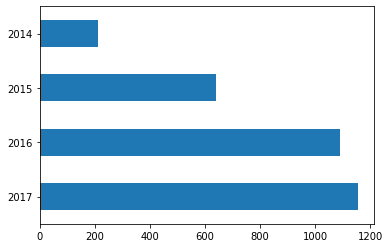

In [75]:
df[(df.Opioid_Related == True) & (df.Year != 2018)].Year.value_counts().plot(ylim = (0, 500), kind='barh')

## Plot the number of fentanyl deaths by year, and the number of heroin deaths by year

- *Tip: You'll want to look up how to use `ylim` - it will let you set each graphic to use the same scale. This should be separate graphics.*
- *Tip: Pay attention to the numbers on your axes. `sort_index()` will be your friend.*
- *Tip: You should probably get rid of 2018*

<AxesSubplot:>

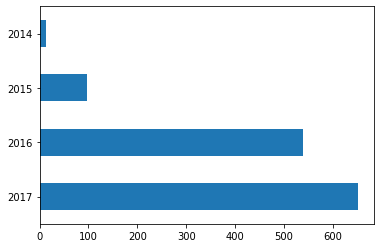

In [76]:

df[(df.Primary_Cause.str.contains("FENTANYL")) & (df.Year != 2018)].Year.value_counts().plot(ylim=(0,500), kind='barh')






<AxesSubplot:>

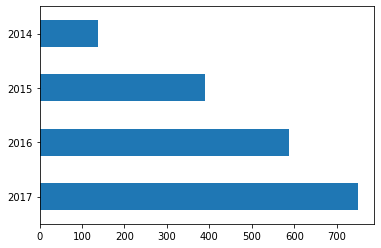

In [77]:
df[(df.Primary_Cause.str.contains("HEROIN")) & (df.Year != 2018)].Year.value_counts().plot(ylim=(0,500), kind='barh')

## How does this compare to gun deaths?

<AxesSubplot:>

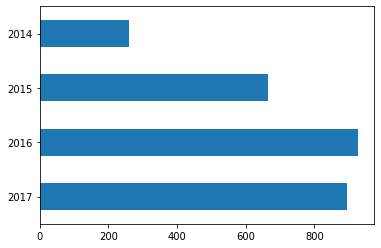

In [78]:
df[(df.Gun_Related == True) & (df.Year != 2018)].Year.value_counts().plot(ylim=(0,500), kind='barh')

## But hey: numbers can lie pretty easily!

The numbers are just so low in 2014 and much higher in 2017. What's going on there?

Well, maybe **there just isn't as much data from the earlier years**. Plot how many entries there are for each year.

<AxesSubplot:>

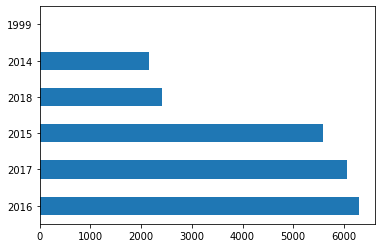

In [80]:
df.Year.value_counts().plot(kind='barh')

And we don't know the best way to fix that up yet, so instead I'm going to give you a present.

# Is the true lesson here, don't move to Cook County, Illinois?

Cook County is basically Chicago. It's probably just certain areas that are trouble, right? Let's investigate that without even having a clue how mapping works.

## Fun bonus: Making cheating maps

### Make a new dataframe of every death in the actual city of Chicago

In [59]:
chicago_deaths = df[df.Incident_City == 'CHICAGO']

### Confirm this new dataframe has 13,627 rows

In [60]:
chicago_deaths.shape

(13627, 21)

### Use lat and long in the worst way possible to make a map

Use `longitude` and `latitude` and `plot` to make a rough map of the city. Chicago [looks like this](https://en.wikipedia.org/wiki/File:DuPage_County_Illinois_Incorporated_and_Unincorporated_areas_Chicago_Highlighted.svg)

- *Tip: Use the `latitude` and `longitude` columns*
- *Tip: You don't want a line graph, of course. Or a bar. What kind is the kind with dots on it?*
- *Tip: Use something like like `figsize=(10,5)` to specify the height and width of the map (but, you know, with better numbers that make it look like chicago)*

## Now let's find out where to live

Make a map of every non-homicide death in Chicago, then plot the homicides on top of it.

Use the `ax=df.plot` trick from the beer cans assignment to plot all of the rows representing homicides vs non-homicides. You can use `color='red'` to make one of them red, and `alpha=0.05` to make each mark very transparent to allow them to layer on top of each other.

## Never tell anyone I let you do that.

But you want to see something actually completely legitimately insane?

**Chicago is one of the most segregated cities in America.** If you'd like to see this for yourself, make a map of `Race`. Plot black vs white in a way similar to what we did above.

Yup.